In [332]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sb

In [333]:
df = pd.read_csv('50_Startups.csv')
df.columns
df.corr()
df




,Administration,Marketing Spend,R&D Spend,Profit
0,136897.80,471784.10,165349.20,192261.83
1,151377.59,443898.53,162597.70,191792.06
2,101145.55,407934.54,153441.51,191050.39
3,118671.85,383199.62,144372.41,182901.99
4,91391.77,366168.42,142107.34,166187.94
5,99814.71,362861.36,131876.90,156991.12
6,147198.87,127716.82,134615.46,156122.51
7,145530.06,323876.68,130298.13,155752.60
8,148718.95,311613.29,120542.52,152211.77
9,108679.17,304981.62,123334.88,149759.96


In [334]:
for i in range(0,4): #standardization of all variables
  df.iloc[:,i] =(df.iloc[:,i]-df.iloc[:,i].mean())/(df.iloc[:,i].var())**0.5


In [335]:
print('here we can see the correlation between variables')
df.corr()



here we can see the correlation between variables


,Administration,Marketing Spend,R&D Spend,Profit
Administration,1.000000,-0.130478,0.197824,0.137055
Marketing Spend,-0.130478,1.000000,0.669662,0.693929
R&D Spend,0.197824,0.669662,1.000000,0.977709
Profit,0.137055,0.693929,0.977709,1.000000


<AxesSubplot:>

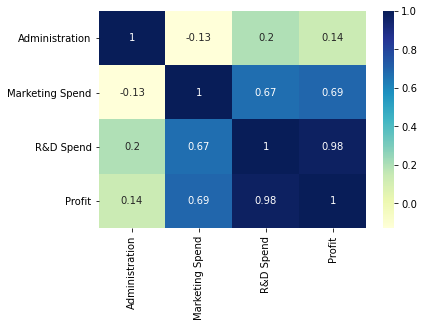

In [336]:
sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [337]:
#converting into orthogonal basis
dff = []
i = 0
while i <3:
    b = []
    b = df.iloc[:,i].values
    dff.append(b)
    i+=1
orth = dff
len(dff)
for i in range(0, len(dff)):
     
     for j in range(0 , i):
        c = [0]*47
        c = c + orth[j]*np.dot(orth[j],orth[i])/np.dot(orth[j],orth[j])#3 orthogonal vectors
        orth[i] = orth[i] - c
orth = np.array(orth)    
for i in range(0, len(orth)):
   orth[i] = orth[i]/(np.dot(orth[i],orth[i]))**0.5 # changing orthogonal vectors to unit basis vectors
da = pd.DataFrame(orth.T)
round(da.corr(),16) # correlation between orthogonal vectors



,0,1,2
0,1.000000e+00,0.0,-1.000000e-16
1,0.000000e+00,1.0,-0.000000e+00
2,-1.000000e-16,-0.0,1.000000e+00


In [338]:
arr = []
for i in range(0,3):
    ar = [0]*47
    for j in range(0,3):
        ar = ar + orth[i]*np.dot(orth[i],dff[j]) #arr reperesents projection of all vectors along 3 orthogonal vectors
    arr.append(ar)
arr = np.array(arr)
#print(arr)
print('projecton of 3 independent variables along 3 orthogonal vector\n')

arr = arr.T
arr #projection of all variables alnog 3 orthogonal vectors
#now we need to calculate projection of profits along 3 orthogonal basis vecotrs



projecton of 3 independent variables along 3 orthogonal vector



array([[ 5.30496988e-01,  2.22700092e+00,  3.30164606e-01],
       [ 1.06844938e+00,  2.05481192e+00,  2.81929766e-01],
       [-7.97768703e-01,  1.49871313e+00,  8.32782743e-01],
       [-1.46632537e-01,  1.36867749e+00,  5.86208192e-01],
       [-1.16014062e+00,  1.08840203e+00,  9.32614396e-01],
       [-8.47212000e-01,  1.10048765e+00,  6.25530519e-01],
       [ 9.13201793e-01, -7.13682753e-01,  1.62417978e+00],
       [ 8.51202253e-01,  9.83240943e-01,  3.35980276e-01],
       [ 9.69675725e-01,  8.92106308e-01,  1.51377386e-01],
       [-5.17880053e-01,  6.40370098e-01,  6.88347145e-01],
       [-4.46736304e-01, -9.37726782e-03,  6.38499500e-01],
       [-1.14532294e+00,  7.83840033e-02,  6.85897383e-01],
       [ 1.74677190e-01,  2.51440389e-01,  1.44855835e-01],
       [ 4.78382838e-01,  3.15626480e-01, -3.92163689e-03],
       [ 1.26051863e+00,  4.51124934e-01,  3.91982955e-01],
       [-6.84781522e-05,  3.32393920e-01,  6.00007304e-01],
       [-3.79370860e-02,  3.49789736e-01

In [339]:
profit = df.loc[:,'Profit'].values
ar =[0]*3
for i in range(0,3):
    ar[i] = np.dot(orth[i],profit)
print('projection of profits along 3 orthogonal vectors')
print(ar) 


projection of profits along 3 orthogonal vectors
[0.9295537419835984, 4.869370278732482, 4.427589035523429]


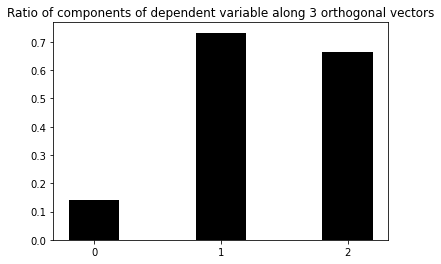

In [340]:
tick = np.arange(0,len(ar),1)
for i in range(0,len(ar)):
    plt.bar(i, (np.dot(ar[i],ar[i])**.5/(ar[0]**2 + ar[1]**2 + ar[2]**2  )**.5), color ='black',width = .4)
    plt.xticks(tick)
    plt.title('Ratio of components of dependent variable along 3 orthogonal vectors')

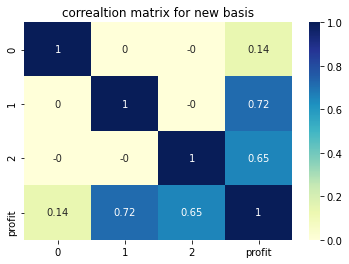

In [341]:
arr = pd.DataFrame(arr)
arr['profit'] = df.loc[:,'Profit']
sb.heatmap(round(arr.corr(),10), cmap="YlGnBu", annot=True)
plt.title('correaltion matrix for new basis')
plt.show()






In [342]:
index = np.arange(0,47,1)

In [348]:
lm_list= []
slope_list = []
slope = 0
lm = []
for i in range(0,3):
    slope = 0
    lm = []
    slope = arr.cov().loc[i,'profit']/(arr.loc[:,i].var())
    lm = arr[i].values*slope
    lm_list.append(lm)
    slope_list.append(slope)
sum = []

lm_list = np.array(lm_list)
lm_list = lm_list.T
sum = []
for i in range(0,47):
    s= 0
    for j in range(0,3):
     s = s+ lm_list[i,j]
    sum.append(s)
print("The root mean square error is")
(((sum - arr.iloc[:,3])**2).mean())**.5


[0.13705522206916626, 0.7241400495317463, 0.9534377865572949]
The root mean square error is


0.19687009767614583